## **Amazon Sales Dataset**

**Import relevant libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tabulate import tabulate
from prettytable import PrettyTable

In [5]:
data = pd.read_excel(r"D:\Data Analytics\PortfolioProjects\Amazon Sale Report.xlsx")

In [6]:
df = data.copy()

### **Firstly lets do some data cleaning**

**Dropping all duplicates**

In [7]:
df = df.drop_duplicates()

In [8]:
df.set_index('index', inplace = True)


In [9]:
df.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [10]:
columns_to_drop = ['ship-country', 'Unnamed: 22', 'fulfilled-by', 'currency','Sales Channel ']
df = df.drop(columns=columns_to_drop)


In [11]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
dtype: int64

**Identifying nulls and filling them**

In [12]:
null_amounts = df[df['Amount'].isnull()]['Amount']
print(null_amounts)

index
8        NaN
29       NaN
65       NaN
84       NaN
95       NaN
          ..
128903   NaN
128907   NaN
128908   NaN
128958   NaN
128967   NaN
Name: Amount, Length: 7795, dtype: float64


In [13]:
null_promotion_ids = df[df['promotion-ids'].isnull()]
print(null_promotion_ids['promotion-ids'])


index
0         NaN
3         NaN
4         NaN
9         NaN
10        NaN
         ... 
128966    NaN
128967    NaN
128969    NaN
128970    NaN
128972    NaN
Name: promotion-ids, Length: 49153, dtype: object


In [14]:
null_courier_status = df[df['Courier Status'].isnull()]['Courier Status']
print(null_courier_status)

index
0         NaN
3         NaN
23        NaN
29        NaN
83        NaN
         ... 
128762    NaN
128808    NaN
128855    NaN
128875    NaN
128890    NaN
Name: Courier Status, Length: 6872, dtype: object


In [15]:
null = df[(df['ship-state'].isnull()) | (df['ship-city'].isnull())  | (df['ship-postal-code'].isnull())]
print(null[['ship-state', 'ship-city','ship-postal-code']])

       ship-state ship-city  ship-postal-code
index                                        
1871          NaN       NaN               NaN
1872          NaN       NaN               NaN
8752          NaN       NaN               NaN
11215         NaN       NaN               NaN
13252         NaN       NaN               NaN
15688         NaN       NaN               NaN
16787         NaN       NaN               NaN
18351         NaN       NaN               NaN
22930         NaN       NaN               NaN
24986         NaN       NaN               NaN
30379         NaN       NaN               NaN
37963         NaN       NaN               NaN
37964         NaN       NaN               NaN
60986         NaN       NaN               NaN
63040         NaN       NaN               NaN
73675         NaN       NaN               NaN
73746         NaN       NaN               NaN
73771         NaN       NaN               NaN
73772         NaN       NaN               NaN
73911         NaN       NaN       

In [16]:
df['promotion-ids'] = df['promotion-ids'].fillna('no promotion')
df['ship-state'] = df['ship-state'].fillna('not known')
df['ship-city'] = df['ship-city'].fillna('not known')
df['ship-postal-code'] = df['ship-postal-code'].fillna('not known')
df['Courier Status'] = df['Courier Status'].fillna('not known')
df['Amount'] = df['Amount'].fillna(0)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   ship-service-level  128975 non-null  object        
 5   Style               128975 non-null  object        
 6   SKU                 128975 non-null  object        
 7   Category            128975 non-null  object        
 8   Size                128975 non-null  object        
 9   ASIN                128975 non-null  object        
 10  Courier Status      128975 non-null  object        
 11  Qty                 128975 non-null  int64         
 12  Amount              128975 non-null  float64       
 13  ship-city           128975 no

**Now we have no NULL Values**

In [18]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids', 'B2B'],
      dtype='object')

### **Sales Trends: Analyze how sales have been trending over time.**

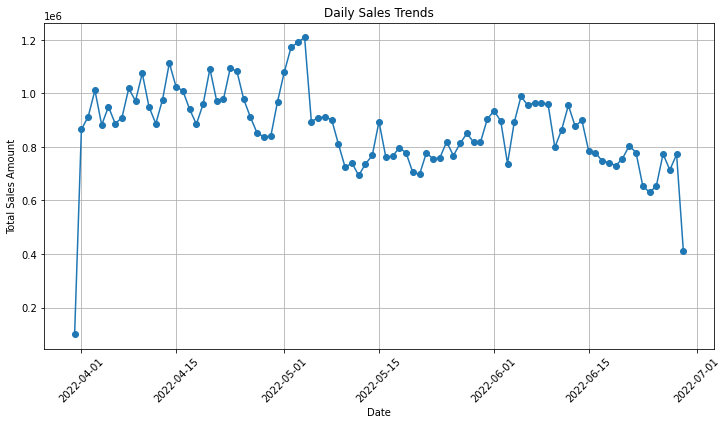

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**The Date and Sales when they were at their maximum**

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Amount'].sum()

max_sales_date = daily_sales.idxmax()
max_sales_amount = daily_sales.max()

results = {
    'Date of Maximum Sales': [max_sales_date],
    'Maximum Sales Amount': [max_sales_amount]
}

results_df = pd.DataFrame(results)
tabulated_data = tabulate(results_df, headers='keys', tablefmt='pretty')

print(tabulated_data)



+---+-----------------------+----------------------+
|   | Date of Maximum Sales | Maximum Sales Amount |
+---+-----------------------+----------------------+
| 0 |  2022-05-04 00:00:00  |      1209364.17      |
+---+-----------------------+----------------------+


**Analyzing sales amount by month**

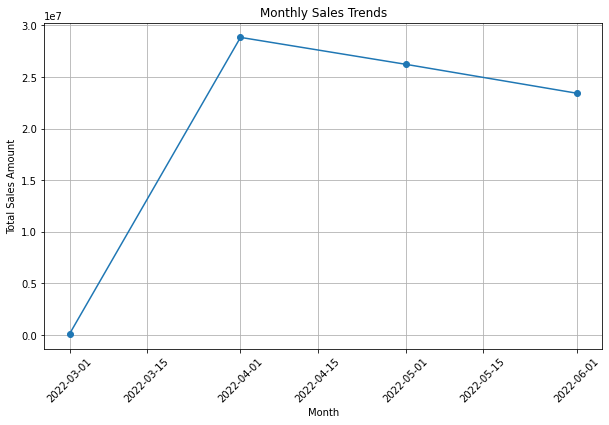

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**The net amount for sales increases linearly from the start of march, reaches peak at the start o f April, and then gradually decreasese till June. The lowest sales are made in June**

**Most-Sold Products:**

In [22]:
product_sales = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False)
product_sales

SKU
JNE3797-KR-L     661
JNE3797-KR-M     561
JNE3797-KR-S     503
JNE3405-KR-L     485
J0230-SKD-M      468
                ... 
JNE3284-KR-XL      0
SAR060             0
JNE3483-KR-M       0
J0323-CD-M         0
BTM027-NP-L        0
Name: Qty, Length: 7195, dtype: int64

**Most-Sold Sizes and Styles:**

In [23]:
size_style_sales = df.groupby(['Size', 'Style'])['Qty'].sum().sort_values(ascending=False)
size_style_sales

Size  Style  
L     JNE3797    730
M     JNE3797    699
S     JNE3797    610
L     JNE3405    485
XL    JNE3797    472
                ... 
M     AN210        0
XXL   BL100        0
XL    JNE3557      0
M     JNE3483      0
XL    BL104        0
Name: Qty, Length: 7053, dtype: int64

**Top Regions by Sales: Identify the regions with the highest sales amounts**

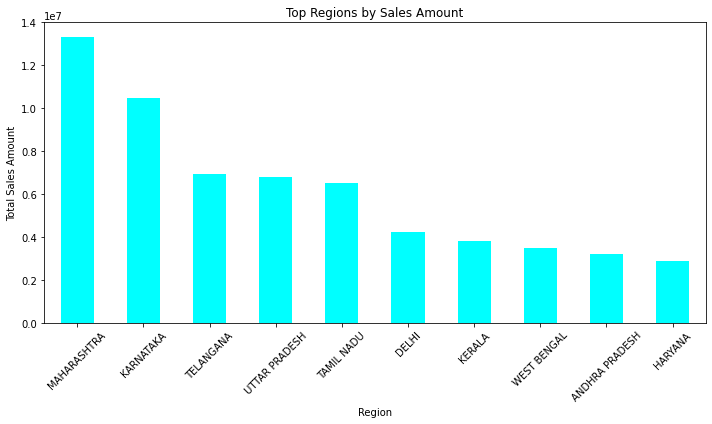

In [24]:
region_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

top_regions = region_sales.head(10)

plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='cyan')
plt.title('Top Regions by Sales Amount')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visualize sales trends amount over time for different states**

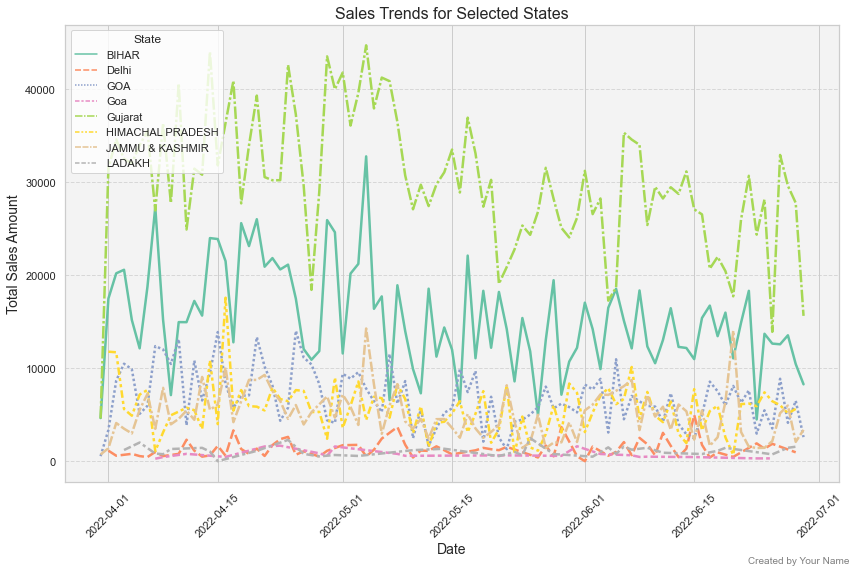

In [25]:
selected_states = ['Gujarat','BIHAR',
       'JAMMU & KASHMIR', 'HIMACHAL PRADESH',
       'Goa', 'GOA',
       'LADAKH', 'Delhi'
       ]

filtered_df = df[df['ship-state'].isin(selected_states)]


region_sales = filtered_df.groupby(['ship-state', 'Date'])['Amount'].sum().reset_index()
pivot_sales = region_sales.pivot(index='Date', columns='ship-state', values='Amount')

sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("Set2", n_colors=len(selected_states))
sns.lineplot(data=pivot_sales, palette=colors, linewidth=2.5)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f3f3f3')

plt.legend(title='State', loc='upper left')
plt.title('Sales Trends for Selected States', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.figtext(0.99, 0.01, 'Created by Your Name', fontsize=10, color='gray', ha='right')

plt.show()


### **Analyze whether different shipping options impact sales and customer satisfaction**

In [26]:
grouped_data = df.groupby('ship-service-level')

metrics_df = grouped_data.agg({
    'Amount': 'sum',         
    'Order ID': 'count',      
}).rename(columns={
    'Order ID': 'Total Orders'
})

metrics_df['Avg Order Value'] = metrics_df['Amount'] / metrics_df['Total Orders']

metrics_df = metrics_df.reset_index()

print(metrics_df)


  ship-service-level      Amount  Total Orders  Avg Order Value
0          Expedited  54285183.0         88615        612.59587
1           Standard  24307495.3         40360        602.26698


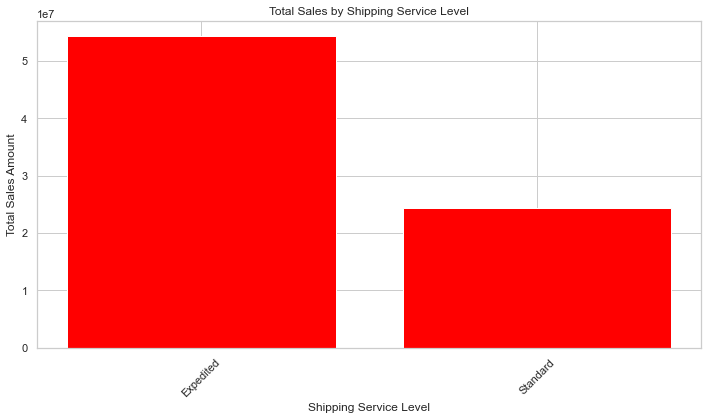

In [27]:
grouped_data = df.groupby('ship-service-level')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['ship-service-level'], grouped_data['Amount'], color='red')
plt.xlabel('Shipping Service Level')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by Shipping Service Level')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


* So the expedited generated more revenue than the standard overall

**Average delivery time and the percentage of on-time deliveries for  shipping service level**

In [28]:
df['Date'] = pd.to_datetime(df['Date'])


delivered_orders = df[(df['Status'] == 'Shipped - Delivered to Buyer') | (df['Status'] == 'Shipped')]
avg_delivery_time = delivered_orders.groupby('ship-service-level')['Date'].apply(lambda x: (x.max() - x.min()).days).reset_index()
avg_delivery_time.columns = ['Shipping Service Level', 'Average Delivery Time (days)']

timeframes = [2, 5]  
percentage_on_time = {}
for timeframe in timeframes:
    on_time_orders = delivered_orders[delivered_orders['Date'] - delivered_orders['Date'].min() <= timedelta(days=timeframe)]
    percentage = (on_time_orders.groupby('ship-service-level')['Date'].count() / delivered_orders.groupby('ship-service-level')['Date'].count()) * 100
    percentage_on_time[f'Within {timeframe} days'] = percentage.reset_index()
    percentage_on_time[f'Within {timeframe} days'].columns = ['Shipping Service Level', f'Percentage Within {timeframe} days (%)']

print("Average Delivery Time:")
print(tabulate(avg_delivery_time, headers='keys', tablefmt='grid', showindex=False))

for timeframe in timeframes:
    print(f"Percentage of Orders Delivered Within {timeframe} days:")
    print(tabulate(percentage_on_time[f'Within {timeframe} days'], headers='keys', tablefmt='grid', showindex=False))
    print()


Average Delivery Time:
+--------------------------+--------------------------------+
| Shipping Service Level   |   Average Delivery Time (days) |
+==========================+================================+
| Expedited                |                             90 |
+--------------------------+--------------------------------+
| Standard                 |                             90 |
+--------------------------+--------------------------------+
Percentage of Orders Delivered Within 2 days:
+--------------------------+--------------------------------+
| Shipping Service Level   |   Percentage Within 2 days (%) |
+==========================+================================+
| Expedited                |                        2.75726 |
+--------------------------+--------------------------------+
| Standard                 |                        1.80573 |
+--------------------------+--------------------------------+

Percentage of Orders Delivered Within 5 days:
+---------------

**Plotting the above code**

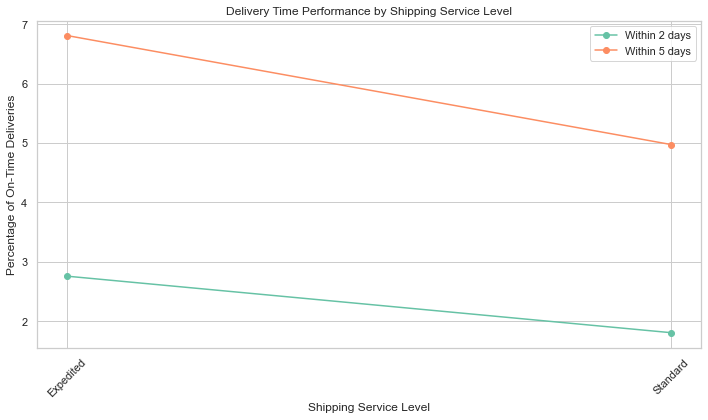

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

delivered_orders = df[(df['Status'] == 'Shipped - Delivered to Buyer') | (df['Status'] == 'Shipped')]
avg_delivery_time = delivered_orders.groupby('ship-service-level')['Date'].apply(lambda x: (x.max() - x.min()).days).reset_index()

timeframes = [2, 5]  
percentage_on_time = {}
for timeframe in timeframes:
    on_time_orders = delivered_orders[delivered_orders['Date'] - delivered_orders['Date'].min() <= timedelta(days=timeframe)]
    percentage = (on_time_orders.groupby('ship-service-level')['Date'].count() / delivered_orders.groupby('ship-service-level')['Date'].count()) * 100
    percentage_on_time[f'Within {timeframe} days'] = percentage.reset_index()

plt.figure(figsize=(10, 6))
for timeframe in timeframes:
    plt.plot(percentage_on_time[f'Within {timeframe} days']['ship-service-level'], percentage_on_time[f'Within {timeframe} days']['Date'], marker='o', label=f'Within {timeframe} days')
plt.xlabel('Shipping Service Level')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Delivery Time Performance by Shipping Service Level')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


### **Analyzing the sales data based on different product categories**

In [30]:
category_sales = df.groupby('Category').agg({'Qty': 'sum', 'Amount': 'sum'}).reset_index()
category_sales['Total Sales Volume'] = category_sales['Qty']

sorted_categories = category_sales.sort_values(by='Total Sales Volume', ascending=True)

tabulated_data = tabulate(sorted_categories, headers='keys', tablefmt='pretty')

# Print the tabulated data
print(tabulated_data)


+---+---------------+-------+-------------+--------------------+
|   |   Category    |  Qty  |   Amount    | Total Sales Volume |
+---+---------------+-------+-------------+--------------------+
| 2 |    Dupatta    |   3   |    915.0    |         3          |
| 4 |     Saree     |  152  |  123933.76  |        152         |
| 1 |    Bottom     |  398  |  150667.98  |        398         |
| 0 |    Blouse     |  863  |  458408.18  |        863         |
| 3 | Ethnic Dress  | 1053  |  791217.66  |        1053        |
| 6 |      Top      | 9903  |  5347792.3  |        9903        |
| 7 | Western Dress | 13943 | 11216072.69 |       13943        |
| 8 |     kurta     | 45045 | 21299546.7  |       45045        |
| 5 |      Set      | 45289 | 39204124.03 |       45289        |
+---+---------------+-------+-------------+--------------------+


The bestselling category is: Set

**Lets take a look at the top 5 most sold products in categories = ['Set', 'kurta','Western Dress']**

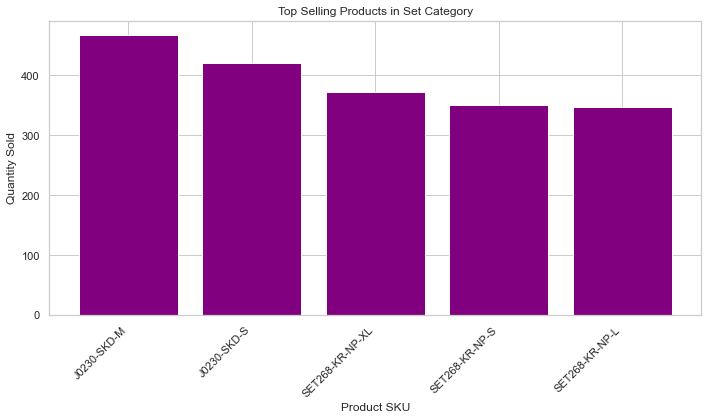

Top Selling Products in 'Set' Category:
+------+-----------------+---------------+--------------+
|      |   Product SKU   | Quantity Sold | Total Amount |
+------+-----------------+---------------+--------------+
| 306  |   J0230-SKD-M   |      468      |   527699.2   |
| 307  |   J0230-SKD-S   |      421      |  479937.14   |
| 1600 | SET268-KR-NP-XL |      373      |  284058.96   |
| 1599 | SET268-KR-NP-S  |      350      |  267030.48   |
| 1597 | SET268-KR-NP-L  |      348      |   258716.0   |
+------+-----------------+---------------+--------------+




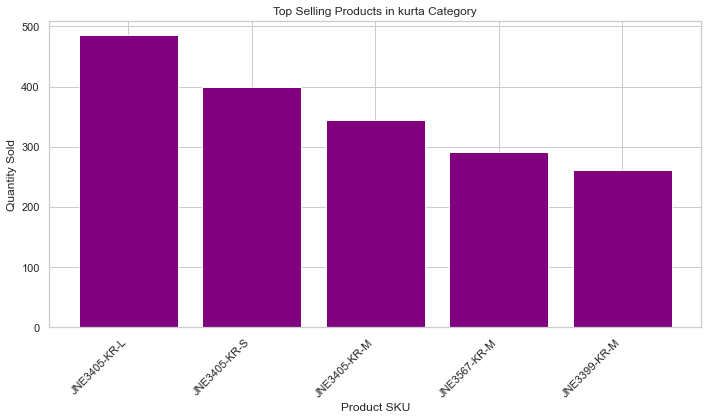

Top Selling Products in 'kurta' Category:
+------+--------------+---------------+--------------+
|      | Product SKU  | Quantity Sold | Total Amount |
+------+--------------+---------------+--------------+
| 886  | JNE3405-KR-L |      485      |  194645.29   |
| 888  | JNE3405-KR-S |      399      |  169808.87   |
| 887  | JNE3405-KR-M |      344      |  146626.29   |
| 1535 | JNE3567-KR-M |      291      |   115806.0   |
| 852  | JNE3399-KR-M |      262      |   113268.0   |
+------+--------------+---------------+--------------+




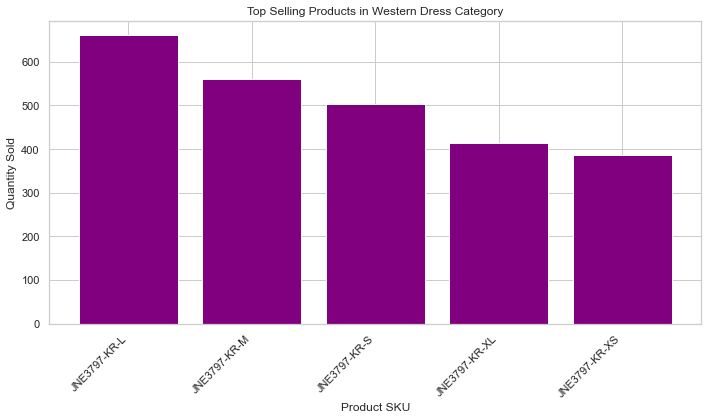

Top Selling Products in 'Western Dress' Category:
+-----+---------------+---------------+--------------+
|     |  Product SKU  | Quantity Sold | Total Amount |
+-----+---------------+---------------+--------------+
| 360 | JNE3797-KR-L  |      661      |  524581.77   |
| 361 | JNE3797-KR-M  |      561      |  454290.16   |
| 362 | JNE3797-KR-S  |      503      |  407302.57   |
| 363 | JNE3797-KR-XL |      415      |  332155.24   |
| 364 | JNE3797-KR-XS |      386      |   303616.7   |
+-----+---------------+---------------+--------------+




In [31]:
categories = ['Set', 'kurta', 'Western Dress']

for category in categories:
    category_data = df[df['Category'] == category]
    top_products = category_data.groupby('SKU').agg({'Qty': 'sum', 'Amount': 'sum'}).reset_index()
    top_products = top_products.sort_values(by='Qty', ascending=False).head(5) 

    plt.figure(figsize=(10, 6))
    plt.bar(top_products['SKU'], top_products['Qty'], color='purple')
    plt.xlabel('Product SKU')
    plt.ylabel('Quantity Sold')
    plt.title(f'Top Selling Products in {category} Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    table_data = top_products[['SKU', 'Qty', 'Amount']]
    table = tabulate(table_data, headers=['Product SKU', 'Quantity Sold', 'Total Amount'], tablefmt='pretty')
    
    print(f"Top Selling Products in '{category}' Category:")
    print(table)
    print("\n")


**Lets take a look at the monthly sales of categories**

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month_name()
order_months = ['March', 'April', 'May', 'June']
df['Month'] = pd.Categorical(df['Month'], categories=order_months, ordered=True)

unique_categories = df['Category'].unique()

for category in unique_categories:
    category_data = df[df['Category'] == category]
    grouped = category_data.groupby(['Category', 'Month'])['Amount'].sum().reset_index()
    grouped.rename(columns={'Amount': 'Total Sales'}, inplace=True)
    
    tabulated_data = tabulate(grouped, headers='keys', tablefmt='pretty')
    
    print(f"Table for Category: {category}")
    print(tabulated_data)
    print("\n")


Table for Category: Set
+---+----------+-------+-------------+
|   | Category | Month | Total Sales |
+---+----------+-------+-------------+
| 0 |   Set    | March |   53884.0   |
| 1 |   Set    | April | 15506675.56 |
| 2 |   Set    |  May  | 12643698.35 |
| 3 |   Set    | June  | 10999866.12 |
+---+----------+-------+-------------+


Table for Category: kurta
+---+----------+-------+-------------+
|   | Category | Month | Total Sales |
+---+----------+-------+-------------+
| 0 |  kurta   | March |  34256.57   |
| 1 |  kurta   | April | 8017145.48  |
| 2 |  kurta   |  May  | 6660576.62  |
| 3 |  kurta   | June  | 6587568.03  |
+---+----------+-------+-------------+


Table for Category: Western Dress
+---+---------------+-------+-------------+
|   |   Category    | Month | Total Sales |
+---+---------------+-------+-------------+
| 0 | Western Dress | March |   7653.28   |
| 1 | Western Dress | April | 2927780.51  |
| 2 | Western Dress |  May  | 4381304.41  |
| 3 | Western Dress | Ju

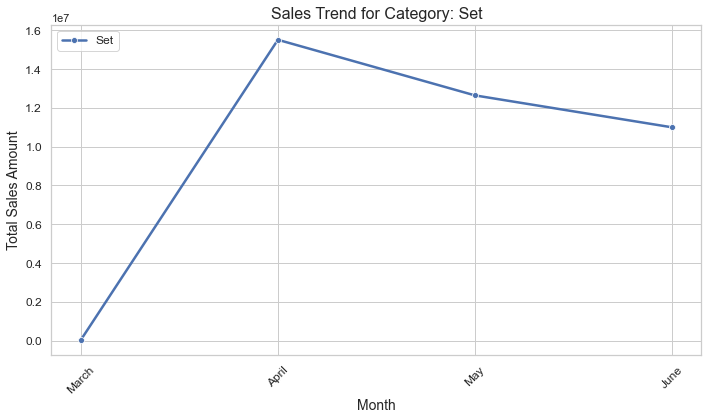

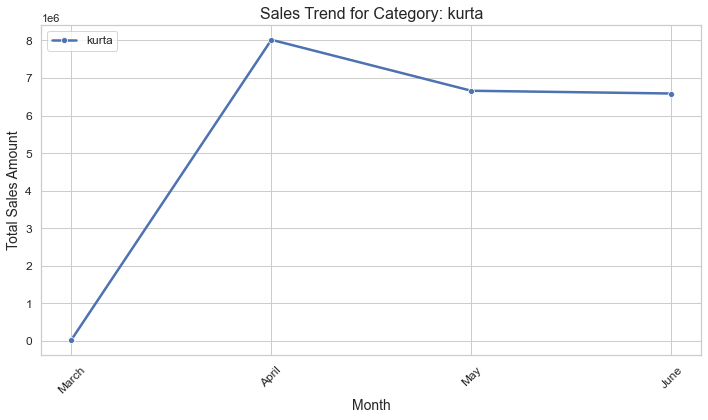

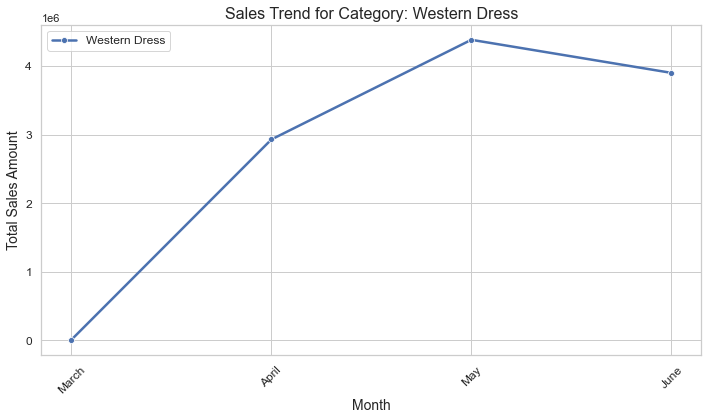

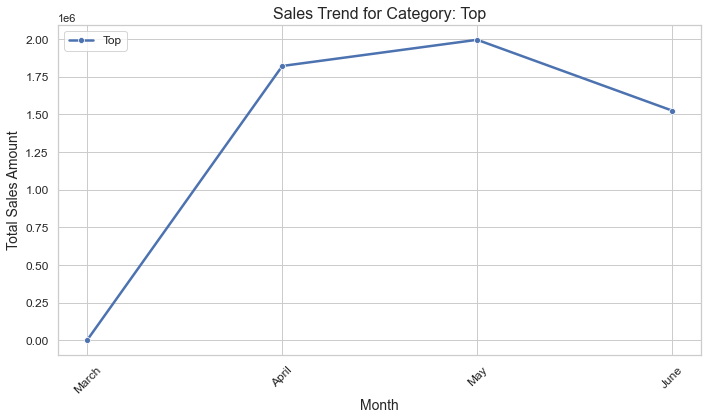

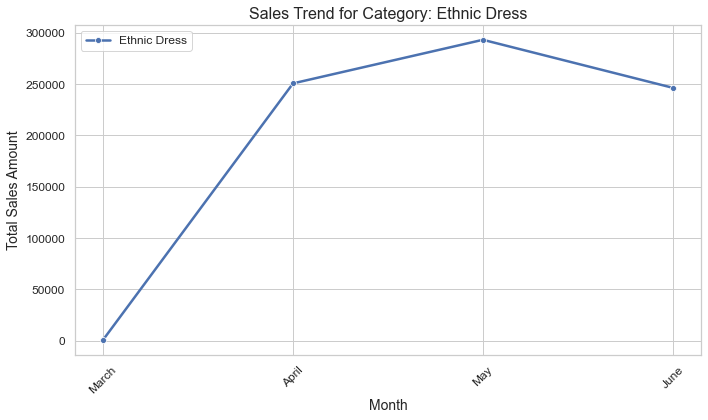

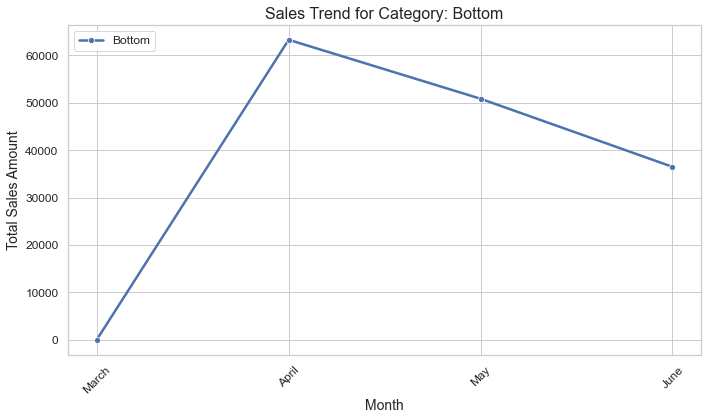

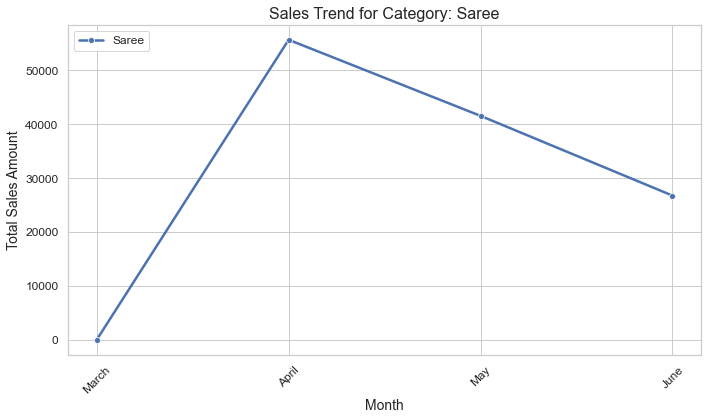

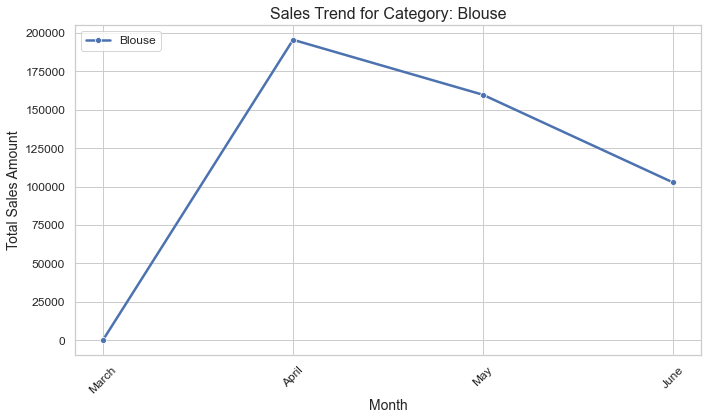

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month_name()
order_months = ['March', 'April', 'May', 'June']
df['Month'] = pd.Categorical(df['Month'], categories=order_months, ordered=True)

unique_categories = df[df['Category'] != 'Dupatta']['Category'].unique()

sns.set(style="whitegrid")

for category in unique_categories:
    category_data = df[(df['Category'] == category) & (df['Category'] != 'Dupatta')]
    grouped = category_data.groupby(['Category', 'Month'])['Amount'].sum().reset_index()
    grouped.rename(columns={'Amount': 'Total Sales'}, inplace=True)
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=grouped, x='Month', y='Total Sales', marker='o', color='b', linewidth=2.5)
    plt.title(f"Sales Trend for Category: {category}", fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Sales Amount', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    plt.grid(True)
    plt.legend([category], loc='upper left', fontsize=12)
    
    plt.show()


**We can see from the graphs that for all the categories, the total Sales amount increases from March to April and later , decreases for some while increases for others. Various insights can be deduced from this statistical analysis.**

**Finaly, save the file in excel format**

In [35]:
# df.to_excel('sales_analysis.xlsx', index=False)